In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('fuel_econ.csv')
print(df.shape)
df.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


# **Scatterplots**
If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second. One basic way of creating a scatterplot is through Matplotlib's ```scatter``` function:

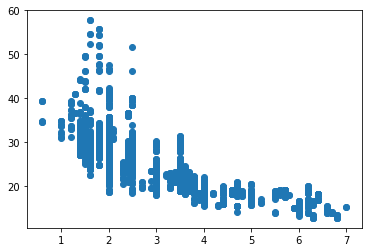

In [3]:
plt.scatter(data = df, x = 'displ', y = 'comb')

We can see a generally negative relationship between the two variables, as higher values of the x-axis variable are associated with greatly decreasing values of the variable plotted on the y-axis.

# **Alternative Approach**
Seaborn's regplot function combines scatterplot creation with regression function fitting:

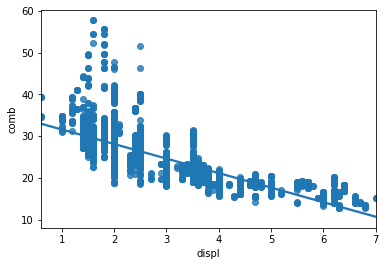

In [4]:
sb.regplot(data = df, x = 'displ', y = 'comb')

By default, the regression function is linear, and includes a shaded confidence region for the regression estimate. In this case, since the trend looks like a ```log(y) ~ x``` relationship, plotting the regression line on the raw units is not appropriate. If we don't care about the regression line, then we could set ```fit_reg = False``` in the ```regplot``` function call. 

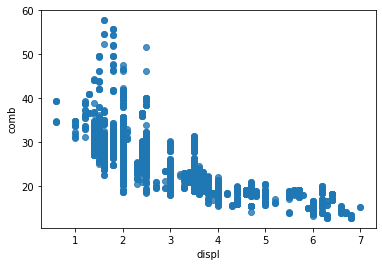

In [5]:
sb.regplot(data = df, x = 'displ', y = 'comb', fit_reg = False)

# **Overplotting, Transparency, and Jitter**
If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

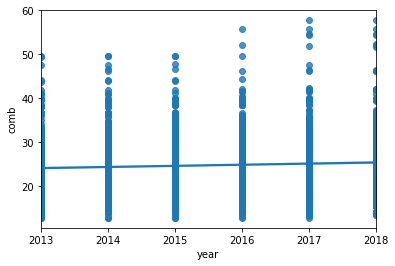

In [6]:
sb.regplot(data = df, x = 'year', y = 'comb')

Where more points overlap, the darker the image will be. Here, we can now see that there is a moderate positive relationship between the two numeric variables.

We can also add jitter to move the position of each point slightly from its true value. This is not a direct option in the scatter function, but is a built-in option with seaborn's regplot function. x- and y- jitter can be added independently, and won't affect the fit of any regression function, if made:

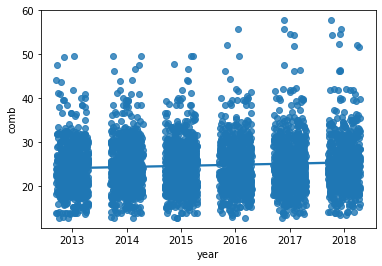

In [7]:
sb.regplot(data = df, x = 'year', y = 'comb', x_jitter=0.3)

In the above plot, we can infer some kind of equal relationship between the two variables, but the degree of variability in the data and strength of relationship are fairly unclear. In cases like this, we may want to employ transparency and jitter to make the scatterplot more informative. Transparency can be added to a scatter call by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque).

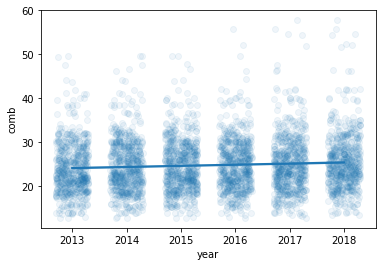

In [8]:
sb.regplot(data = df, x = 'year', y = 'comb', x_jitter=0.3, scatter_kws = {'alpha' : 1/15})

The jitter settings will cause each point to be plotted in a uniform ±0.2 range of their true values. Note that transparency has been changed to be a dictionary assigned to the "scatter_kws" parameter. This is necessary so that transparency is specifically associated with the scatter component of the regplot function.



# **Heat Maps**
A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's ```hist2d``` function.

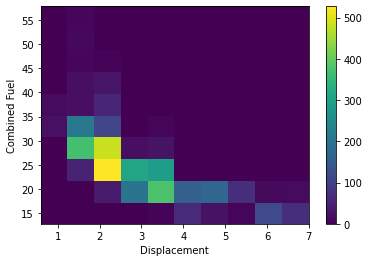

In [9]:
plt.hist2d(data = df, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel("Displacement")
plt.ylabel('Combined Fuel');

As the color in the heatmap gets brighter and moves from blue to yellow, the higher the count of points in the corresponding cell.

Heatmaps can also be used as 2-d versions of bar charts, plotting counts on combinations of two categorical variables instead of numeric variables. There is a function in seaborn, ```heatmap```, that is built for categorical heatmaps. This will be discussed in more detail later in the lesson, in the section "Clustered Bar Charts".

# **Additional Variations**
To select a different color palette, you can set the "cmap" parameter in ```hist2d```. The most convenient way of setting a palette is to use a string referencing a built-in Matplotlib palette. A list of valid strings can be found on this part of the Pyplot API documentation. A further discussion of color in plots will be left to the next lesson. For now, I will just show an example of reversing the default "viridis" color palette, by setting ``cmap = 'viridis_r'```.

Furthermore, I would like to distinguish cells with zero counts from those with non-zero counts. The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a ```cmin = 0.5``` parameter to the ```hist2d call```, this means that a cell will only get colored if it contains at least one point.

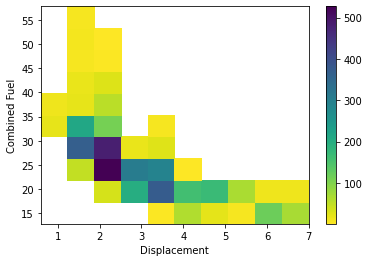

In [10]:
plt.hist2d(data = df, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r')
plt.colorbar()
plt.xlabel("Displacement")
plt.ylabel('Combined Fuel');

# **Violin Plots**
There are a few ways of plotting the relationship between one quantitative and one qualitative variable, that demonstrate the data at different levels of abstraction. The violin plot is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram. There is an extra section at the end of the previous lesson that provides more insight into kernel density estimates.

Seaborn's ``violinplot`` function can be used to create violin plots combined with box plots – we'll discuss box plots on the next page.

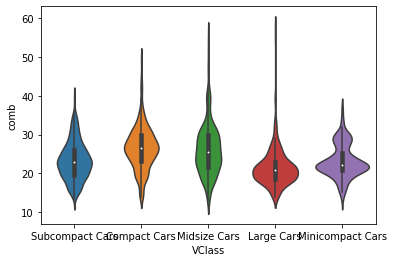

In [11]:
sb.violinplot(data = df, x = 'VClass', y = 'comb')

Here, you can see that the numeric data takes on a different shape in each categorical level: Some bimodality is suggested in group Alpha, a relatively high variance is observed in Beta, and Gamma and Delta are skewed negatively and positively, respectively. You can also see that each level has been rendered in a different color, like how the plain ```countplot``` was in the previous lesson. We can set the "color" parameter to make each curve the same color if it is not meaningful.

Inside each curve, there is a black shape with a white dot inside. This is the miniature box plot mentioned above. A further discussion of box plots will be performed on the next page. If you'd like to remove the box plot, you can set the ```inner = None``` parameter in the ```violinplot``` call to simplify the look of the final visualization.

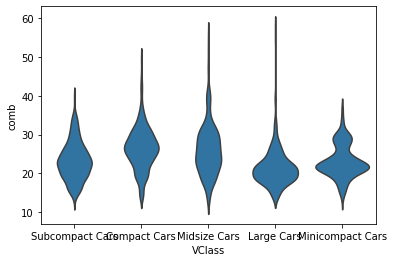

In [12]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = 'VClass', y = 'comb', color = base_color,
              inner = None)

# **Additional Variation**
Much like how the bar chart could be rendered with horizontal bars, the violin plot can also be rendered horizontally. Seaborn is smart enough to make an appropriate inference on which orientation is requested, depending on whether "x" or "y" receives the categorical variable. But if both variables are numeric (e.g., one is discretely-valued) then the "orient" parameter can be used to specify the plot orientation.

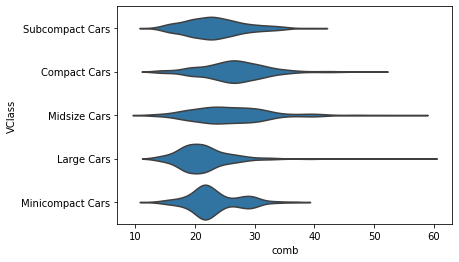

In [13]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df, y = 'VClass', x = 'comb', color = base_color,
              inner = None)

# **Box Plots**
A box plot is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. A box plot can be created using seaborn's ```boxplot``` function.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

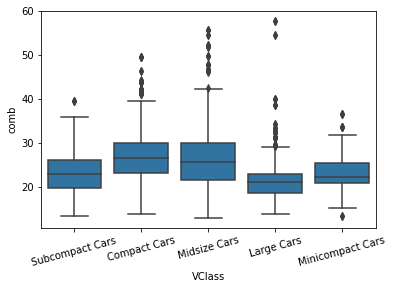

In [14]:
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'VClass', y = 'comb', color = base_color)
plt.xticks(rotation=15)

Note that the "color" parameter is being used here to make each box the same color. In order to provide a better comparison of the violin and box plots, a ```ylim``` expression has been added to the second plot to match the two plots' y-axis limits. The Axes object returned by ```violinplot``` is assigned to a variable, ax1 is used to programmatically obtain those limit values.

The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default this is 1.5 times the IQR. For the Gamma level, there are points below the lower whisker that indicate individual outlier points that are more than 1.5 times the IQR below the first quartile.

Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots. You can clearly see from the box plot that the Delta group has the lowest median. On the other hand, the box plot lacks as nuanced a depiction of distributions as the violin plot: you can't see the slight bimodality present in the Alpha level values. The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.

# **Additional Variations**
As with ```violinplot```, ```boxplot``` can also render horizontal box plots by setting the numeric and categorical features to the appropriate arguments.

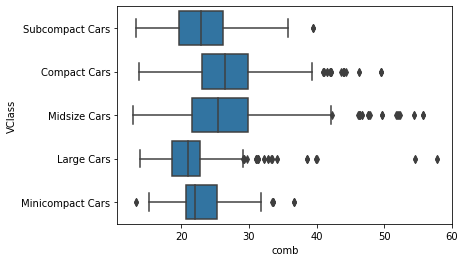

In [15]:
base_color = sb.color_palette()[0]
sb.boxplot(data = df, y = 'VClass', x = 'comb', color = base_color)

In ```violinplot```, there is an additional option for plotting summary statistics in the violin, beyond the default mini box plot. By setting inner = 'quartile', three lines will be plotted within each violin area for the three middle quartiles. The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

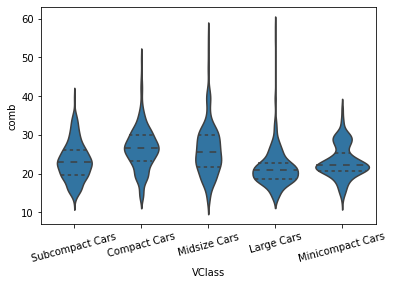

In [16]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = 'VClass', y = 'comb', color = base_color,
              inner = 'quartile')
plt.xticks(rotation=15)

# **Clustered Bar Charts**
To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a clustered bar chart. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's ```countplot``` function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument:

In [17]:
df["trans_type"] = df["trans"].apply(lambda x: x.split()[0])

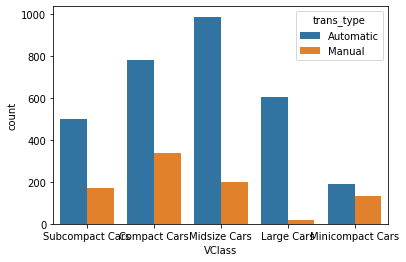

In [18]:
sb.countplot(data = df, x = 'VClass', hue = 'trans_type')

The first categorical variable is depicted by broad x-position (Control, Experiment A, Experiment B). Within each of these groups, three bars are plotted, one for each level of the second categorical variable (Low, Medium, High). Color differentiates each level, and is documented with the legend in the upper-right corner of the plot. The plot tells us that the three "cat_var1" groups are fairly balanced in frequencies across the "cat_var2" levels, though the "Experiment A" group appears to have slighly lower counts of "Medium" points (orange central bar) compared to the other two groups.

The legend position in this example is a bit distracting, however. We can use an Axes method to set the legend properties on the Axes object returned from ```countplot```.

# **Alternative Approach (Heat Map)**
One alternative way of depicting the relationship between two categorical variables is through a heat map. Heat maps were introduced earlier as the 2-d version of a histogram; here, we're using them as the 2-d version of a bar chart. The seaborn function heatmap is at home with this type of heat map implementation, but the input arguments are unlike most of the visualization functions that have been introduced in this course. Instead of providing the original dataframe, we need to summarize the counts into a matrix that will then be plotted.

In [19]:
ct_counts = df.groupby(['VClass', 'trans_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')

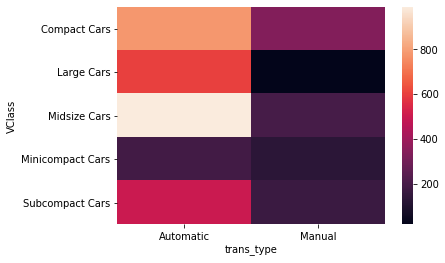

In [20]:
sb.heatmap(ct_counts)

Compared to the clustered bar chart, however, there is less precision interpreting the magnitude of differences. For this reason, we might want to add annotations to the plot to report counts within each cell.

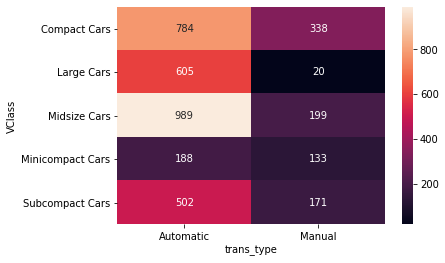

In [21]:
sb.heatmap(ct_counts, annot = True, fmt = 'd')

```annot = True``` makes it so annotations show up in each cell, but the default string formatting only goes to two digits of precision. Adding ```fmt = 'd'``` means that annotations will all be formatted as integers instead. You can use ```fmt = '.0f'``` if you have any cells with no counts, in order to account for ```NaN```s.

